#Importing required module

In [ ]:
import tensorflow as tf
tf.__version__

'2.12.0'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Data set
**i use the linear function ``f(x) = x*2 + 10``**

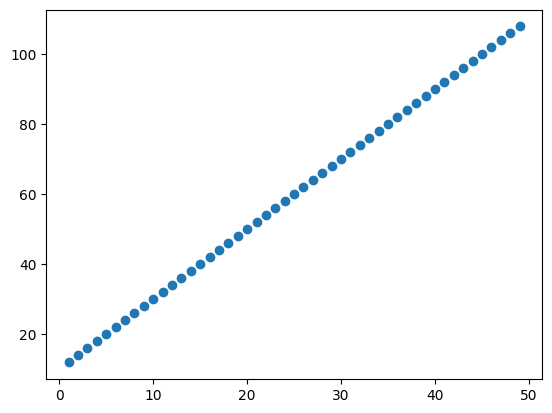

In [ ]:
x = np.arange(1,50)
y = x*2 + 10
plt.scatter(x,y)

**split the data ``80%`` for trainin  and ``20%`` for testing **

In [66]:
#lenght of x and y is 50
x_train = x[:int(len(x)*0.8)] # 80% of data
y_train = y[:int(len(y)*0.8)]
x_test = x[int(len(x)*0.8):] # 20% of data
y_test = y[int(len(y)*0.8):]
len(x_train), len(x_test),len(x)

(39, 10, 49)

**training data in blue and testing data in green**

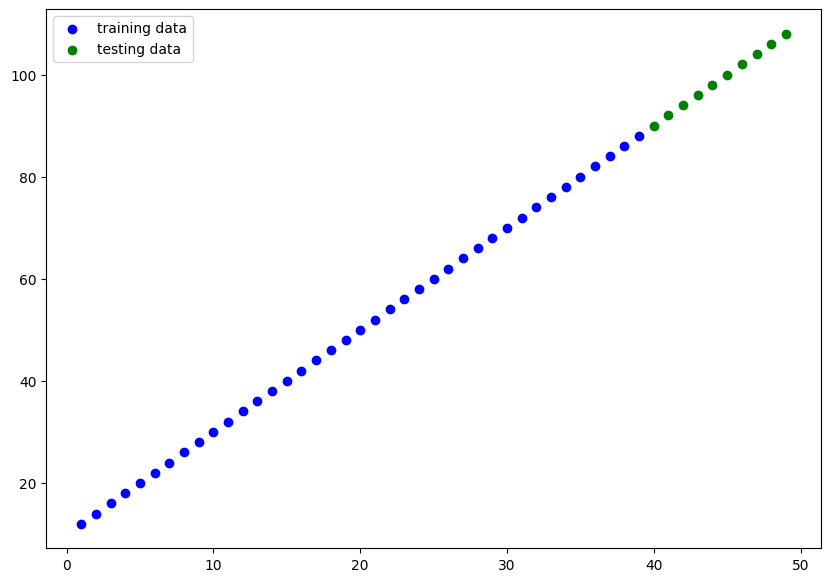

In [67]:
plt.figure(figsize=(10, 7))
plt.scatter(x_train, y_train, c='b', label='training data')
plt.scatter(x_test, y_test, c='g', label='testing data')
plt.legend();

# build the module of machine learning


In [87]:
tf.random.set_seed(42)

# i use one input and one output 1 -> algorithm -> 1 and 10 neron
model = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1),
  ])

#and i use the mean absoult error for loss data and metrics & Adam for optimizer
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              metrics=["mae"])

h = model.fit(tf.expand_dims(x_train, axis=-1), y_train, epochs=400)

Epoch 1/400
2/2 [==============================] - 1s 18ms/step - loss: 47.0827 - mae: 47.0827
Epoch 2/400
2/2 [==============================] - 0s 9ms/step - loss: 45.2634 - mae: 45.2634
Epoch 3/400
2/2 [==============================] - 0s 11ms/step - loss: 43.4059 - mae: 43.4059
Epoch 4/400
2/2 [==============================] - 0s 11ms/step - loss: 41.5312 - mae: 41.5312
Epoch 5/400
2/2 [==============================] - 0s 12ms/step - loss: 39.5698 - mae: 39.5698
Epoch 6/400
2/2 [==============================] - 0s 13ms/step - loss: 37.6441 - mae: 37.6441
Epoch 7/400
2/2 [==============================] - 0s 12ms/step - loss: 35.6734 - mae: 35.6734
Epoch 8/400
2/2 [==============================] - 0s 15ms/step - loss: 33.6351 - mae: 33.6351
Epoch 9/400
2/2 [==============================] - 0s 10ms/step - loss: 31.5285 - mae: 31.5285
Epoch 10/400
2/2 [==============================] - 0s 17ms/step - loss: 29.3636 - mae: 29.3636
Epoch 11/400
2/2 [==============================] 

# Visualizng the model


Text(0.5, 0, 'epochs')

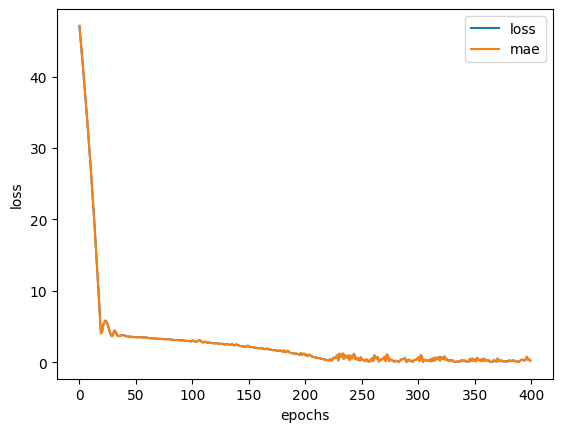

In [88]:
import pandas as pd
pd.DataFrame(h.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

# Evaluate the model

In [89]:
model.evaluate(x_test, y_test)

1/1 [==============================] - 0s 138ms/step - loss: 0.4020 - mae: 0.4020


[0.4019714295864105, 0.4019714295864105]

# Testing
testing the model with new variable (not see it before)

**remember :** ``f(x) = x*2 + 10``

In [90]:
model.predict([65.0])

1/1 [==============================] - 0s 83ms/step


array([[140.60004]], dtype=float32)

i use x_test data for testing

In [91]:
result = model.predict(x_test)
result

1/1 [==============================] - 0s 70ms/step


array([[ 90.35848 ],
       [ 92.36814 ],
       [ 94.37782 ],
       [ 96.387474],
       [ 98.39713 ],
       [100.40681 ],
       [102.416466],
       [104.426125],
       [106.43579 ],
       [108.44546 ]], dtype=float32)

**Now i plot it**


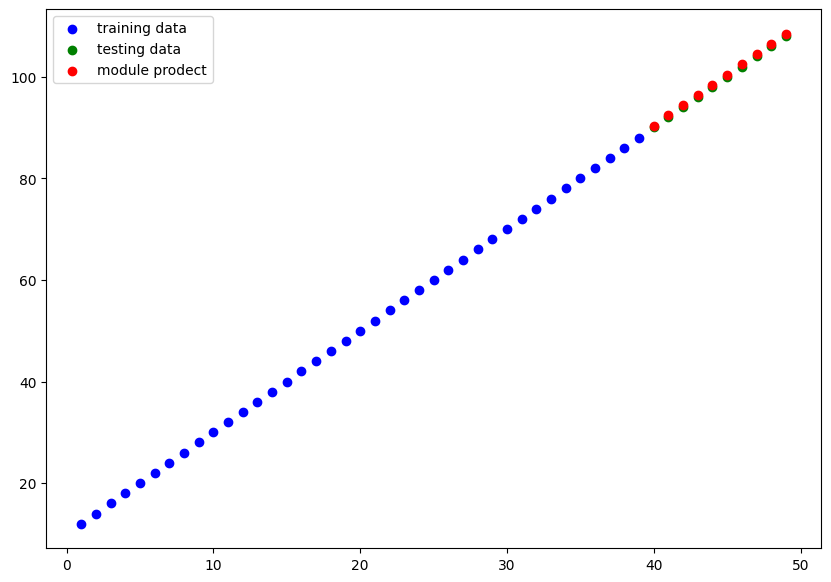

In [92]:
plt.figure(figsize=(10,7))
plt.scatter(x_train,y_train,c='b',label="training data")
plt.scatter(x_test,y_test,c='g',label="testing data")
plt.scatter(x_test,result,c='r',label="module prodect")
plt.legend();

# Saving
**save the model to used in any other appliction (web , mobile ...)**

In [93]:
model.save('ml_model')